información:

**1.bloque de almacen:** bloques A,B,C,D,E donde se almacenan productos

**2.Modo de envío:** La empresa envía los productos de múltiples formas, como barco, vuelo y carretera.

**3.Llamadas de atención al cliente:** Número de llamadas realizadas desde consulta para consulta del envío.

**4.Calificación del cliente:** La empresa ha calificado a cada cliente. 1 es el más bajo (peor), 5 es el más alto (mejor).

**5.Costo del Producto:** Costo del Producto en Dólares Estadounidenses.
Compras Anteriores: El Número de Compra Anterior.

**6.Importancia del producto:** La empresa ha categorizado el producto en diversos parámetros, como bajo, medio y alto.

**7.Género:** Masculino o Femenino

**8.Descuento ofrecido:** Descuento ofrecido en ese producto específico.

**9.Peso en gms:** Es el peso en gramos.

**10.Llegado a tiempo:** Es la variable objetivo, donde 1 Indica que el producto NO ha llegado a tiempo y 0 indica que ha llegado a tiempo.

Estos datos de Seguimiento de Envío de Productos, responden al instante a tus dudas:

- ¿Cuál fue la calificación del cliente? ¿Y el producto fue entregado a tiempo?

- ¿Se está respondiendo la consulta del cliente?

- Si la importancia del producto es alta. ¿Tiene la calificación más alta o se entrega a tiempo?


In [2]:
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("Train.csv")
data.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


(10999, 12)

In [5]:
data = data.fillna(0)
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
data = data.drop(columns=['ID'])

In [7]:
data.corr()['Reached.on.Time_Y.N'].sort_values()

Weight_in_gms         -0.268793
Cost_of_the_Product   -0.073587
Customer_care_calls   -0.067126
Prior_purchases       -0.055515
Customer_rating        0.013119
Discount_offered       0.397108
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

In [8]:
data_numerica = data.select_dtypes(include=[np.number])
print(f'este conjunto posee {data_numerica.shape[1]} features numericos:')
data_numerica.dtypes

este conjunto posee 7 features numericos:


Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

<h1>Datos Numéricos</h1>

array([[<AxesSubplot:title={'center':'Customer_care_calls'}>,
        <AxesSubplot:title={'center':'Customer_rating'}>,
        <AxesSubplot:title={'center':'Cost_of_the_Product'}>],
       [<AxesSubplot:title={'center':'Prior_purchases'}>,
        <AxesSubplot:title={'center':'Discount_offered'}>,
        <AxesSubplot:title={'center':'Weight_in_gms'}>],
       [<AxesSubplot:title={'center':'Reached.on.Time_Y.N'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

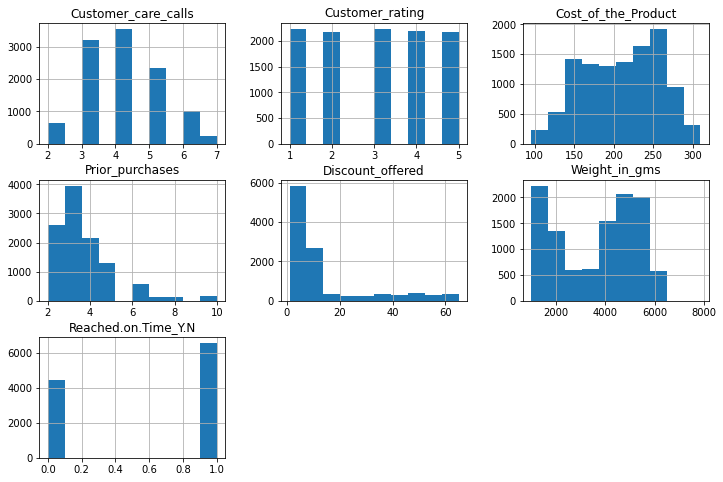

In [9]:
# for i in data_numerica.columns:
#     plt.figure(figsize=(12,8))
#     sbs.histplot(data=data_numerica[i])
data_numerica.hist(figsize=(12,8))

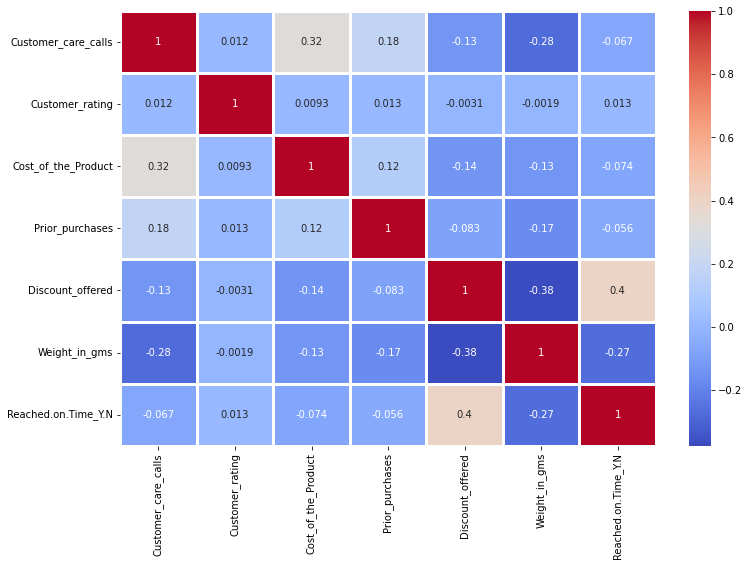

In [10]:
plt.figure(figsize=(12,8))
sbs.heatmap(data=data_numerica.corr(method='pearson'),annot=True,cmap='coolwarm',linewidths=3,linecolor='white')
plt.show()

observaciones: 

- **dicount offered** (descuento ofrecido) posee una correlacion de 0.4 con la variable **reached on time** (llego a tiempo)

- **llamadas del cliente** tiene una correlación de 0.32 con el **costo del producto**

- **el peso en gramos** tiene una correlación negativa -0.13 con el **costo del producto** y de -0.27 con **si llego a tiempo el paquete**

Estudiaremos la relación de estás variables con mayor correlación entre si.

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

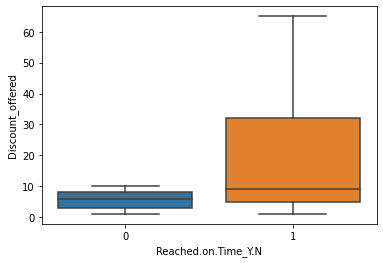

In [11]:
sbs.boxplot(data=data_numerica,x='Reached.on.Time_Y.N',y='Discount_offered')

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

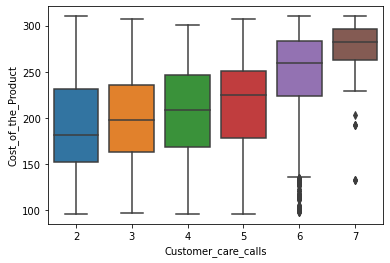

In [12]:
sbs.boxplot(data=data_numerica,y='Cost_of_the_Product',x='Customer_care_calls')

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

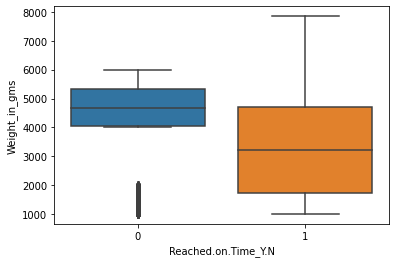

In [13]:
sbs.boxplot(data=data_numerica,x='Reached.on.Time_Y.N',y='Weight_in_gms')

In [14]:
data_numerica.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


<h1>Datos Categóricos</h1>

In [15]:
data_categorica = data[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender']]
print(f'este conjunto posee {data_categorica.shape[1]} features categoricos:')
data_categorica.dtypes

este conjunto posee 7 features categoricos:


Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Prior_purchases         int64
Product_importance     object
Gender                 object
dtype: object

In [16]:
y = data['Reached.on.Time_Y.N']
tabla = pd.concat([data_categorica,y],axis=1)
tabla.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached.on.Time_Y.N
0,D,Flight,4,2,3,low,F,1
1,F,Flight,4,5,2,low,M,1
2,A,Flight,2,2,4,low,M,1
3,B,Flight,3,3,4,medium,M,1
4,C,Flight,2,2,3,medium,F,1


In [17]:
tabla['Customer_rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

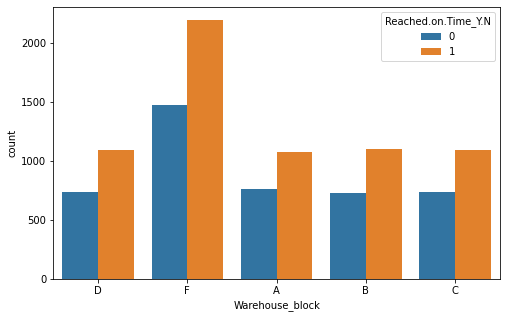

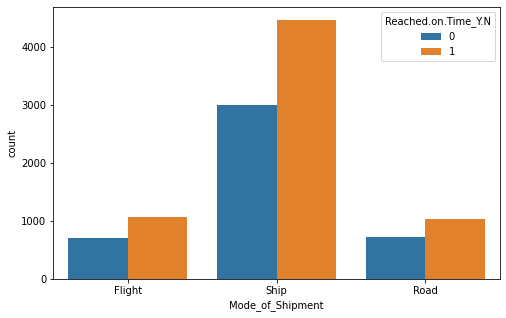

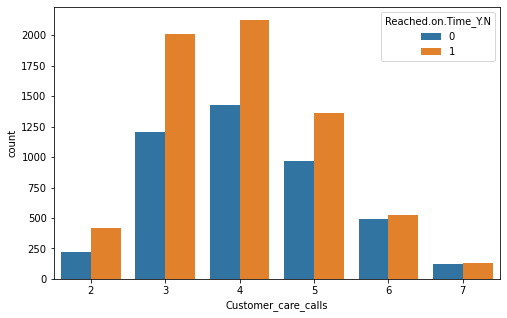

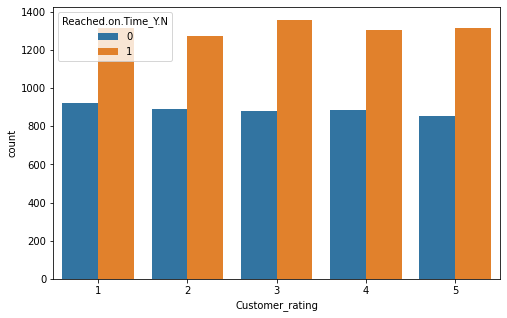

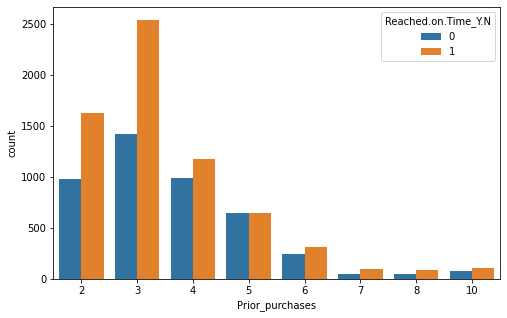

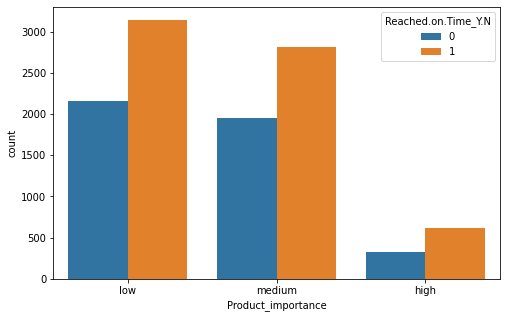

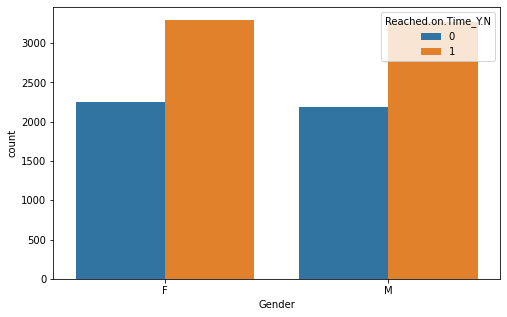

In [18]:
for i in data_categorica.columns:
    plt.figure(figsize=(8,5))
    sbs.countplot(data=tabla,x=tabla[i],hue=tabla['Reached.on.Time_Y.N'])
    plt.show()

<h1>Preprocesamiento de datos</h1>

In [19]:
#Para trabajar con variables categoricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
#Para trabajar con variables numéricas
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [21]:
X = data.drop(columns=['Reached.on.Time_Y.N'],axis=1)
X.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,3,low,F,44,1233
1,F,Flight,4,5,216,2,low,M,59,3088
2,A,Flight,2,2,183,4,low,M,48,3374
3,B,Flight,3,3,176,4,medium,M,10,1177
4,C,Flight,2,2,184,3,medium,F,46,2484


In [22]:
y = data['Reached.on.Time_Y.N']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

In [23]:
categoricas = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
clase = OneHotEncoder()
categoricas_str = ColumnTransformer([("clase",clase,categoricas)],remainder="passthrough")
categoricas_str_X = categoricas_str.fit_transform(X)
X_dummy = pd.DataFrame(categoricas_str_X)
X_dummy.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,177.0,3.0,44.0,1233.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0,216.0,2.0,59.0,3088.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,183.0,4.0,48.0,3374.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,176.0,4.0,10.0,1177.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,184.0,3.0,46.0,2484.0


In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_dummy,y,test_size=0.2,random_state=0,shuffle= True)


<h1>Entrenamientos de Modelos de Predicción</h1>

Logistic Regression

In [25]:
escalado = StandardScaler()
X_train = escalado.fit_transform(X_train)
X_test = escalado.transform(X_test)

In [26]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_predict_LR = model_LR.predict(X_test)

RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parametros = {
    "n_estimators":[int(i) for i in np.linspace(10,80,10)],
    "max_depth": [2,4],
    "max_features": ["auto","sqrt"],
    "min_samples_split": [2,5],
    "min_samples_leaf": [1,2],
    "bootstrap": [True,False]
}

model_rs = RandomForestClassifier()

In [29]:
randomForest_grid = GridSearchCV(estimator=model_rs,param_grid=parametros,n_jobs=-1,cv=5,verbose=2)

randomForest_grid.fit(X_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


c:\Users\USUARIO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [30]:
print(randomForest_grid.best_params_)
print("--------------------------------------------------------------")
print(randomForest_grid.best_estimator_)
print("----------------------------------------------------------------------")
print(randomForest_grid.best_score_)

{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 48}
--------------------------------------------------------------
RandomForestClassifier(max_depth=4, max_features='auto', min_samples_leaf=2,
                       n_estimators=48)
----------------------------------------------------------------------
0.674396738849553


In [31]:
randomForest_model = RandomForestClassifier(n_estimators=64,max_depth=4,min_samples_split=5,
                                            min_samples_leaf=2,max_features='sqrt',bootstrap=True).fit(X_train,y_train)
y_predict_rf = randomForest_model.predict(X_test)

Support Vector Classifier

In [32]:
from sklearn.svm import SVC

parametros = {
    "C": [0.1,1,10,100,1000],
    "gamma": [1,0.1,0.01,0.001,0.0001],
    "kernel": ['rbf'],
}

model_svc = SVC()
svc_grid = GridSearchCV(model_svc,param_grid=parametros,n_jobs=-1,cv=5,verbose=2)
svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [33]:
print(svc_grid.best_params_)
print("--------------------------------------------------------------")
print(svc_grid.best_estimator_)
print("----------------------------------------------------------------------")
print(svc_grid.best_score_)

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
--------------------------------------------------------------
SVC(C=0.1, gamma=0.01)
----------------------------------------------------------------------
0.6654173988319809


In [35]:
svc_model = SVC(C=0.1,gamma=0.01,kernel='rbf').fit(X_train,y_train)
y_predict_svc = svc_model.predict(X_test)

K neighbor

In [39]:
from sklearn.neighbors import KNeighborsClassifier

parametros = {
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
    "weights":['uniform','distance'],
    "p":[1,2],
    "algorithm":  ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": [15, 20,30]
}

model_kn = KNeighborsClassifier()
kn_grid = GridSearchCV(estimator=model_kn,param_grid=parametros,n_jobs=-1,cv=5,verbose=2)
kn_grid.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 20, 30],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=2)

In [40]:
print(kn_grid.best_params_)
print("--------------------------------------------------------------")
print(kn_grid.best_estimator_)
print("----------------------------------------------------------------------")
print(kn_grid.best_score_)

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
--------------------------------------------------------------
KNeighborsClassifier(leaf_size=15, n_neighbors=7)
----------------------------------------------------------------------
0.6466639748824228


In [41]:
kn_model = KNeighborsClassifier(n_neighbors=7,weights='uniform',algorithm='auto',leaf_size=15,p=2).fit(X_train,y_train)
y_predict_kn = kn_model.predict(X_test)

MATRIZ DE CONFUSIÓN, ESCOGIENDO EL MEJOR MODELO

In [58]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay,confusion_matrix

In [64]:
def metricas_y_matriz(y_real,y_predict,modelo):
    accuracy = accuracy_score(y_true=y_real,y_pred=y_predict)
    precision = precision_score(y_true=y_real,y_pred=y_predict)
    recall = recall_score(y_true=y_real,y_pred=y_predict)
    f1 = f1_score(y_true=y_real,y_pred=y_predict)
    # metric_dict = {"accuracy": round(accuracy, 2),
    #                "precision": round(precision, 2),
    #                "recall": round(recall_score, 2),
    #                "f1": round(f1_score, 2)}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}" )
    print("----------------------------------------------------------------------------------------------------")
    print("Matriz de confusion")
    cm = confusion_matrix(y_real,y_predict,labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelo.classes_)
    disp.plot()
    plt.show()

Accuracy: 63.55%
Precision: 0.69
Recall: 0.68
F1 score: 0.69
----------------------------------------------------------------------------------------------------
Matriz de confusion


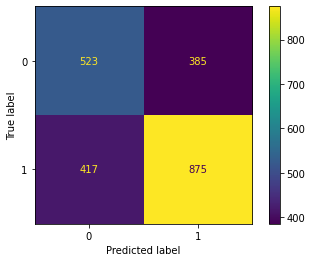

In [65]:
metricas_y_matriz(y_test,y_predict_LR,model_LR)

Accuracy: 67.23%
Precision: 0.77
Recall: 0.62
F1 score: 0.69
----------------------------------------------------------------------------------------------------
Matriz de confusion


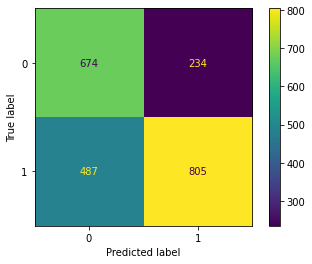

In [71]:
metricas_y_matriz(y_test,y_predict_rf,randomForest_model)

Accuracy: 66.27%
Precision: 0.76
Recall: 0.62
F1 score: 0.69
----------------------------------------------------------------------------------------------------
Matriz de confusion


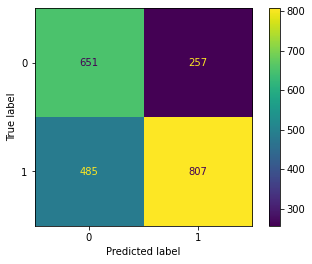

In [70]:
metricas_y_matriz(y_test,y_predict_svc,svc_model)

Accuracy: 62.00%
Precision: 0.69
Recall: 0.65
F1 score: 0.67
----------------------------------------------------------------------------------------------------
Matriz de confusion


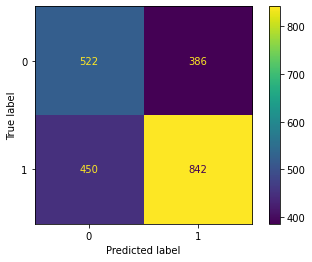

In [69]:
metricas_y_matriz(y_test,y_predict_kn,kn_model)